In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill'>

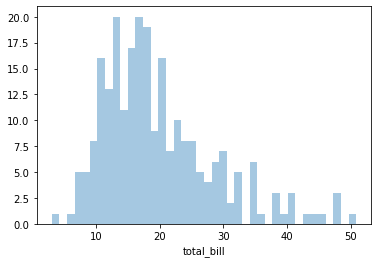

In [9]:
sns.distplot(tips['total_bill'], kde=False,bins = 40)

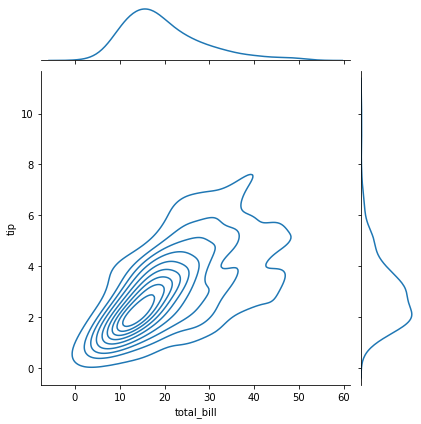

In [13]:
#sns.jointplot(x='total_bill',y='tip',data=tips, kind = 'hex')
#sns.jointplot(x='total_bill',y='tip',data=tips, kind = 'reg')
sns.jointplot(x='total_bill',y='tip',data=tips, kind = 'kde')

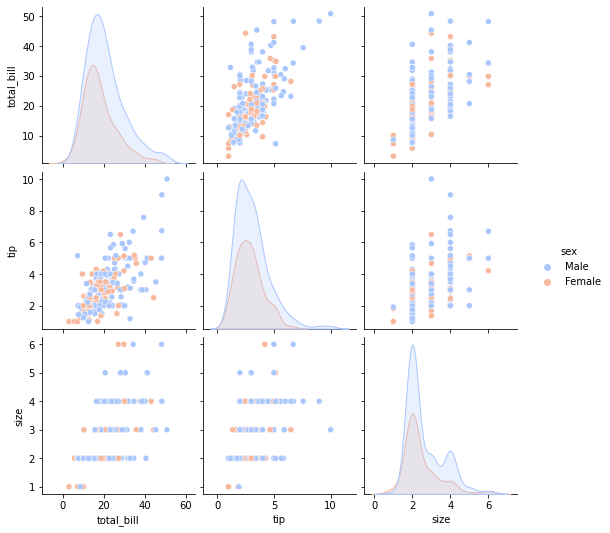

In [17]:
sns.pairplot(tips, hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

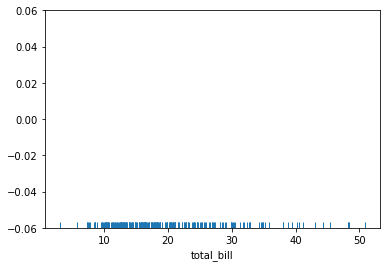

In [18]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

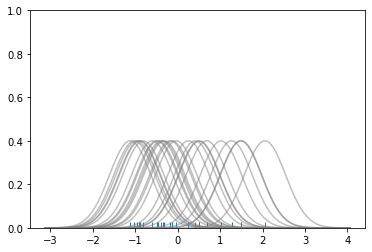

In [19]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [21]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

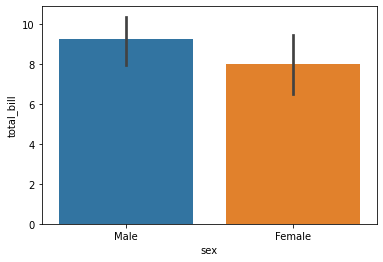

In [22]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator= np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

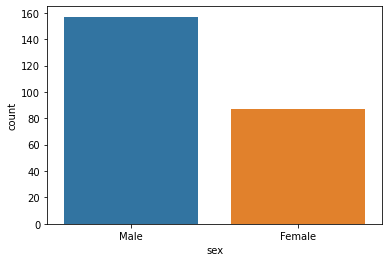

In [23]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

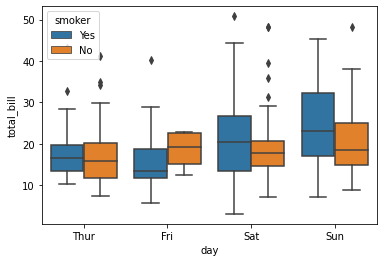

In [26]:
sns.boxplot(x='day',y='total_bill', data=tips, hue = 'smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

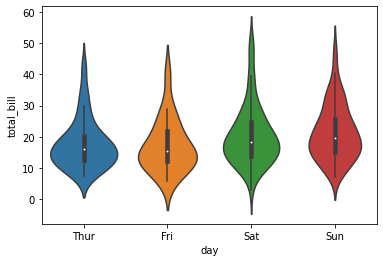

In [27]:
sns.violinplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

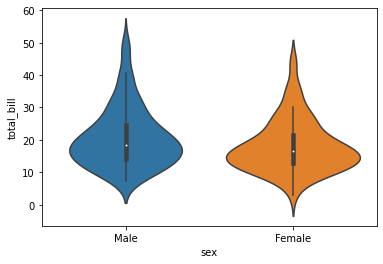

In [29]:
 sns.violinplot(x='sex',y='total_bill',data=tips, split = True)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

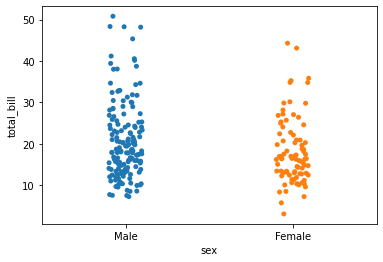

In [31]:
sns.stripplot(x='sex', y = 'total_bill', data= tips, jitter= True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

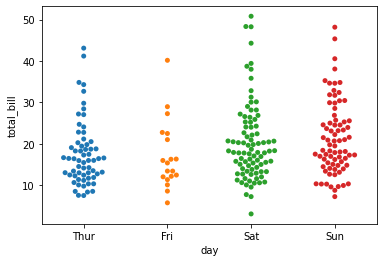

In [32]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

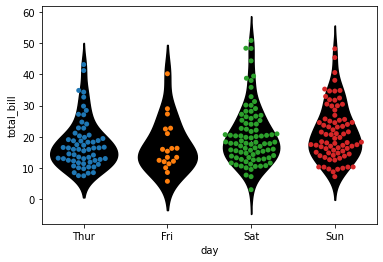

In [33]:
sns.violinplot(x='day',y='total_bill',data=tips,color='black')
sns.swarmplot(x='day',y='total_bill',data=tips)

C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


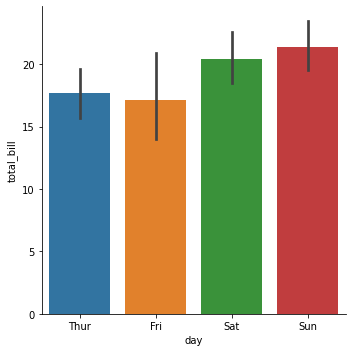

In [34]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='bar')

In [47]:
flights = sns.load_dataset('flights')

In [48]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [38]:
tc =tips.corr()

<AxesSubplot:>

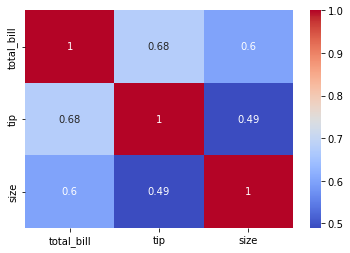

In [42]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [40]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [49]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [50]:
flights.pivot_table(index='month',columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [51]:
fp= flights.pivot_table(index='month',columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

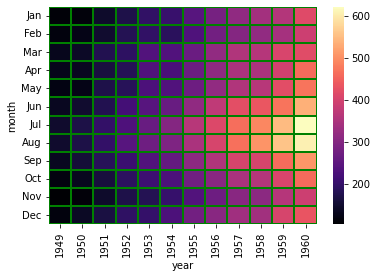

In [56]:
sns.heatmap(fp, cmap='magma',linewidths=2,linecolor='green')

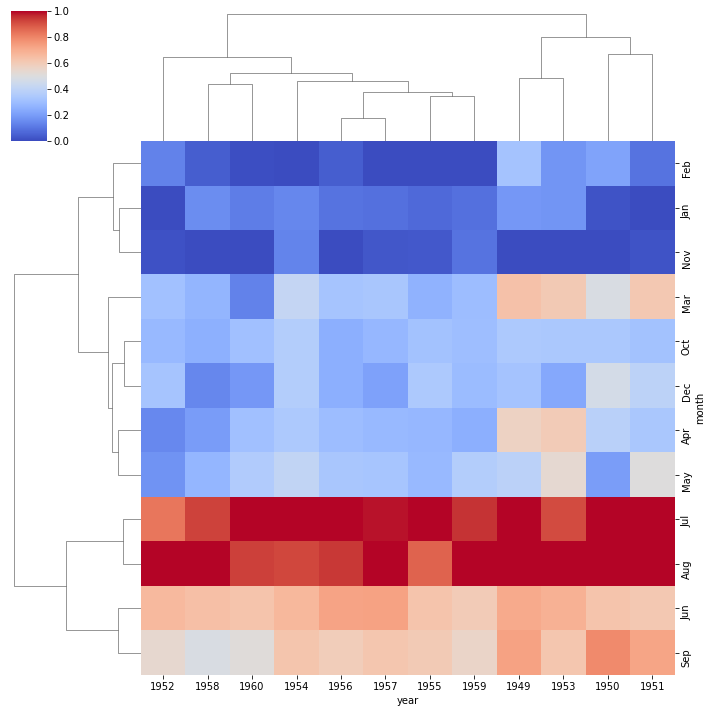

In [60]:
sns.clustermap(fp, cmap='coolwarm',standard_scale=1)

In [61]:
iris = sns.load_dataset('iris')

In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


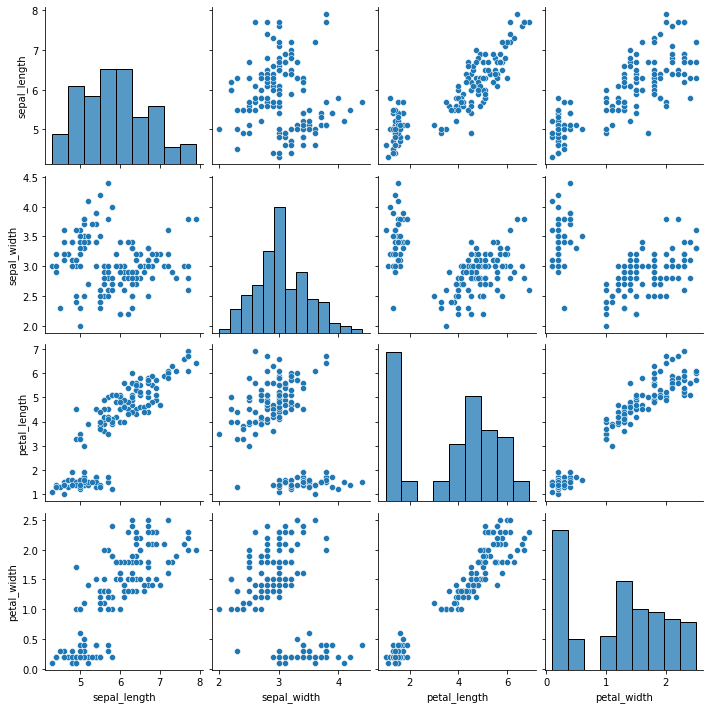

In [63]:
sns.pairplot(iris)

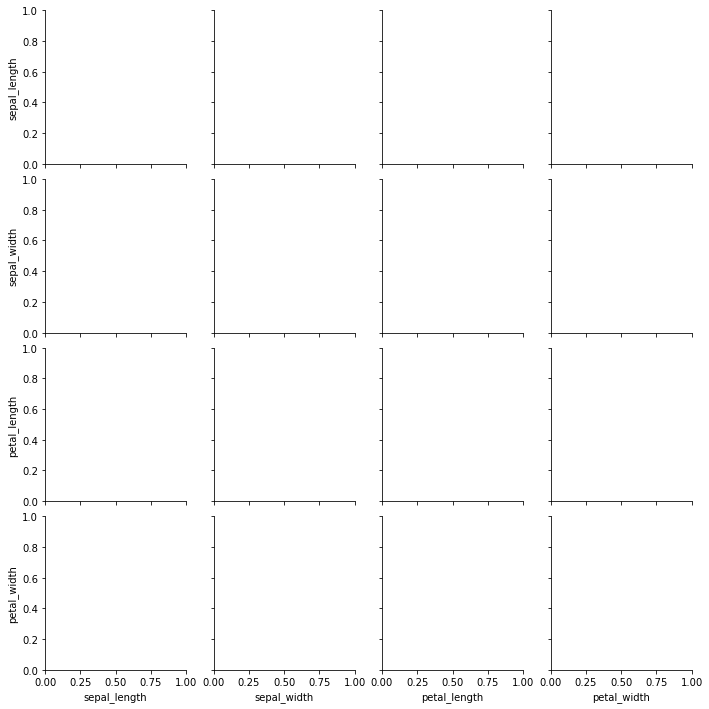

In [64]:
sns.PairGrid(iris)

C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

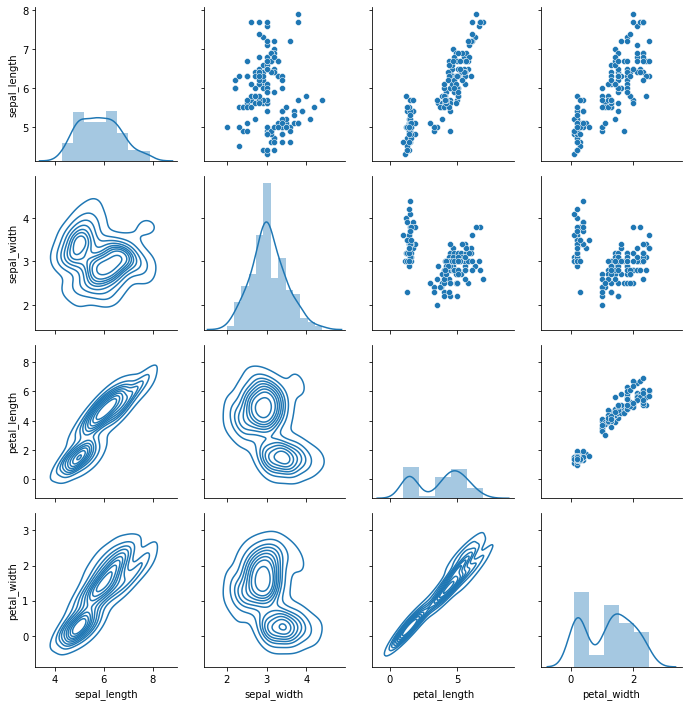

In [66]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

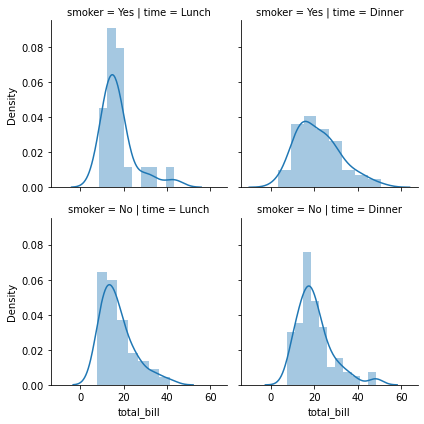

In [69]:
g = sns.FacetGrid(data=tips, col='time',row='smoker')
g.map(sns.distplot,'total_bill')

In [70]:
#regression plots


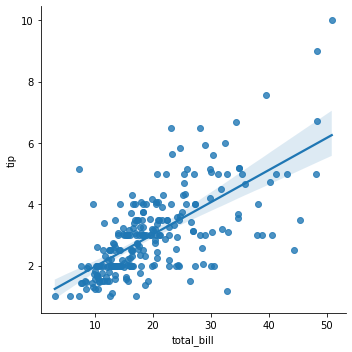

In [74]:
sns.lmplot(x='total_bill',y='tip', data= tips)

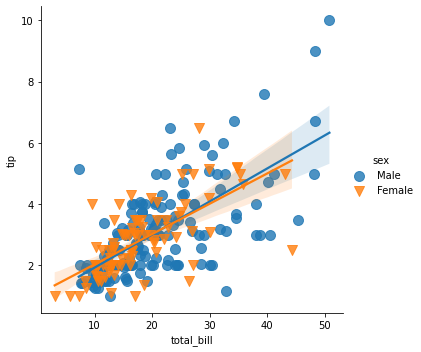

In [79]:
sns.lmplot(x='total_bill',y='tip', data= tips,hue='sex',markers=['o','v']
          ,scatter_kws={'s':100})

C:\Users\NH1021\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


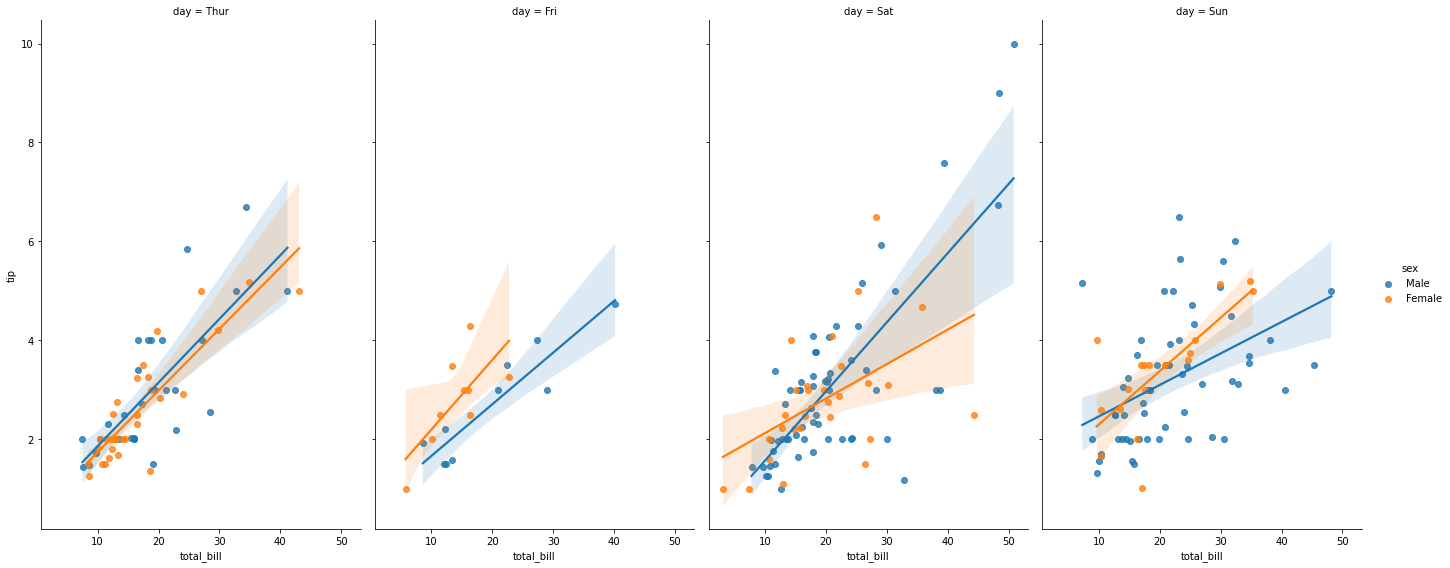

In [84]:
sns.lmplot(x='total_bill',y='tip', data= tips, col='day', hue='sex',
          aspect = 0.6, size=8)

In [85]:
#style and color

<AxesSubplot:xlabel='sex', ylabel='count'>

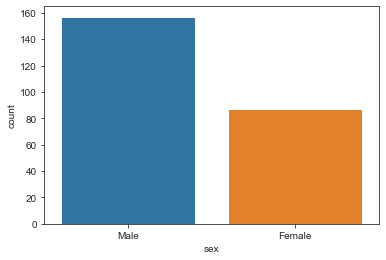

In [93]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
#sns.despine(left=True,bottom=True)


<AxesSubplot:xlabel='sex', ylabel='count'>

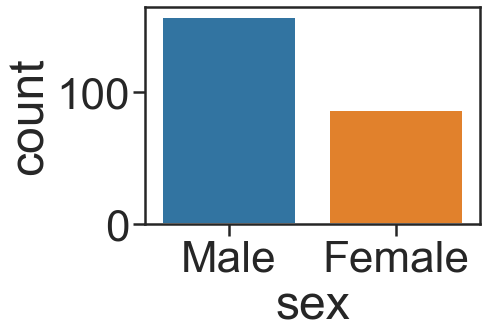

In [98]:
#plt.figure(figsize=(12,3))
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips)


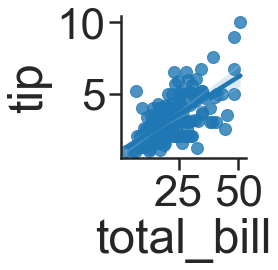

In [108]:
sns.lmplot(x='total_bill',y='tip',data=tips, palette='seismic')